# House Rocket Project

## 1. Bibliotecas

In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## 2. Dados/Funções

## 2.1. Importação de Dados para projeto

In [35]:
data = pd.read_csv('kc_house_data.csv')

## 2.3 Visualização e transformação de Dados

In [36]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [37]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [38]:
data.shape

(21613, 21)

In [39]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [40]:
# converter a coluta data de object para date
data['date'] = pd.to_datetime(data['date'])

# 2.4 Limpeza de dados

In [41]:
# Deletando os ID's repetidos, deixando o último cadastrado

data = data.drop_duplicates(subset = ['id'], keep = 'last')

data.sort_values('id').head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2497,1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,0,0,...,7,2400.0,0,1991,0,98002,47.3262,-122.214,2060,7316
6735,1200019,2014-05-08,647500.0,4,1.75,2060,26036,1.0,0,0,...,8,1160.0,900,1947,0,98166,47.4444,-122.351,2590,21891
8411,1200021,2014-08-11,400000.0,3,1.00,1460,43000,1.0,0,0,...,7,1460.0,0,1952,0,98166,47.4434,-122.347,2250,20023
8809,2800031,2015-04-01,235000.0,3,1.00,1430,7599,1.5,0,0,...,6,1010.0,420,1930,0,98168,47.4783,-122.265,1290,10320
3557,3600057,2015-03-19,402500.0,4,2.00,1650,3504,1.0,0,0,...,7,760.0,890,1951,2013,98144,47.5803,-122.294,1480,3504


In [42]:
# Remoção de Outliers do nosso dataset

unique = data[['bedrooms','bathrooms','floors','waterfront','view','condition','grade']]

for i in unique:
    print('Atributo: {} - {}'.format(i, data[i].unique().tolist()))       

Atributo: bedrooms - [3, 2, 4, 5, 1, 6, 7, 0, 8, 9, 11, 10, 33]
Atributo: bathrooms - [1.0, 2.25, 3.0, 2.0, 4.5, 1.5, 2.5, 1.75, 2.75, 3.25, 4.0, 3.5, 0.75, 4.75, 5.0, 4.25, 3.75, 0.0, 1.25, 5.25, 6.0, 0.5, 5.5, 6.75, 5.75, 8.0, 7.5, 7.75, 6.25, 6.5]
Atributo: floors - [1.0, 2.0, 1.5, 3.0, 2.5, 3.5]
Atributo: waterfront - [0, 1]
Atributo: view - [0, 3, 4, 2, 1]
Atributo: condition - [3, 5, 4, 1, 2]
Atributo: grade - [7, 6, 8, 11, 9, 5, 10, 12, 4, 3, 13, 1]


In [43]:
# na coluna bedrooms, tem uma linha que vamos afirmar como outlier por diferenciar muito do número menor que o dele

data.drop(data.loc[data['bedrooms'] == 33].index, inplace=True)


# 3.0 Análise Exploratória dos dados

## 3.1 Novas colunas

In [44]:
# Antes de tudo, irei adicionar algumas colunas com métricas estabelecidas para a análise dos dados

# fazendo uma copia do dataset, para não comprometer os dados originais
df = data.copy()

# coluna criada para análisar a H2. 

df['yr_old'] = df['yr_built'].apply(lambda x: '> 1955' if x > 1955
        else '< 1955')

# coluna criada para analisar a h3
      
df['basement'] = df['sqft_basement'].apply(lambda x: 'no' if x == 0
        else 'yes')      

# coluna criada para analisar a h4

df['year'] = pd.to_datetime(df['date']).dt.year

# coluna criada para analisar a h5

df['describe_bathrooms'] = df['bathrooms'].apply(lambda x: '> 3' if x >= 3.0
                                            else '< 3')


# Uma métrica estabelecida é visualizar a variação de preço pela sazonalidade, por isso iremos criar uma coluna com esse dado

df['month'] = pd.to_datetime(df['date']).dt.month
df['season'] = df['month'].apply(lambda x: 'summer' if (x > 5) & (x < 8) else
                                           'spring' if (x > 2) & (x < 5) else
                                           'fall' if (x > 8) & (x < 12) else
                                           'winter')

df['condition_name'] = df['condition'].apply(lambda x:   'péssimo' if x == 1 else
                                                         'ruim' if x == 2 else
                                                         'medio'if x == 3 else
                                                         'muito bom' if x == 4 else
                                                         'perfeito')

## 3.2 Hipóteses

Irei análisar as 5 hipóteses abaixo e avaliar em verdadeiras ou falsas:

H1: Imóveis que possuem vista para água, são 30% mais caros, na média. 

H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.
#separar o dataset entre imóveis menores que 1955 e maior que 1955, tirar a média dos dois grupos e ver a diferença

H3: Imóveis sem porão possuem área total (sqrt_lot), são 40% maiores do que os imóveis com porão.

H4: O crescimento do preço dos imóveis YoY ( Year over Year) é de 10%.

H5: Quanto maior o número de banheiros, maior será o preço

 ### H1 . Imóveis que possuem vista para água, são 30% mais caros, na média.

 Para analisar essa hipótese, irei agrupar os preços dos imóveis com vista para água e sem, depois irei plotar em barras para analisarmos o resultado

<AxesSubplot:xlabel='waterfront', ylabel='price'>

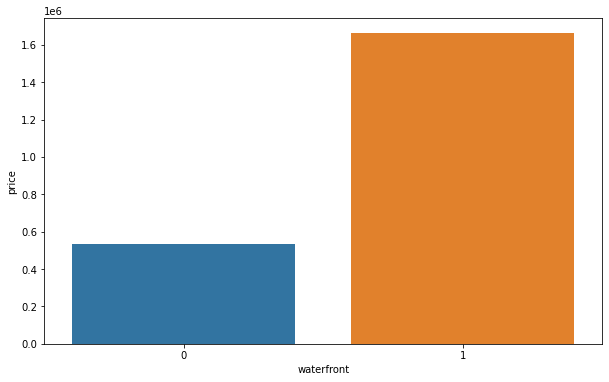

In [45]:
h1 = df[['price','waterfront']].groupby('waterfront').mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x = h1['waterfront'],y = h1['price'])

In [46]:
h1_percent = (h1.loc[1,'price'] - h1.loc[0,'price']) / h1.loc[0,'price']
print('H1 é verdadeira. Os imóveis com vista pra agua são na média {0:.0%} mais caros'.format(h1_percent))

H1 é verdadeira. Os imóveis com vista pra agua são na média 212% mais caros


### H2. Móveis com data de construção menor que 1955, são 50% mais baratos, na média.
 separar o dataset entre imóveis menores que 1955 e maior que 1955, tirar a média dos dois grupos e ver a diferença


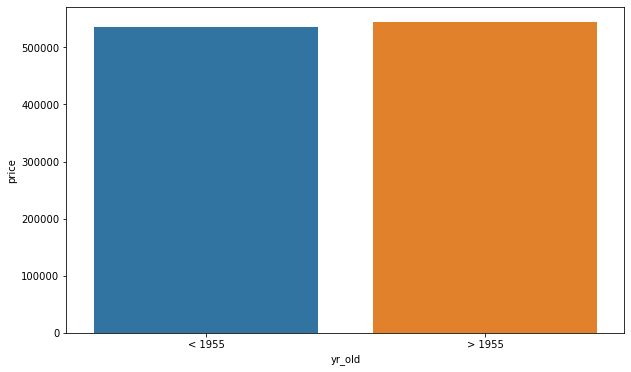

In [47]:

h2 = df[['price','yr_old']].groupby('yr_old').mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x = h2['yr_old'],y = h2['price'])

h2_percent = (h2.loc[1,'price'] - h2.loc[0,'price']) / h2.loc[1,'price']

In [48]:
h2_percent = (h2.loc[1,'price'] - h2.loc[0,'price']) / h2.loc[1,'price']
print('H2 é falsa, a média de preço é irrelevante. Os imóveis construídos antes de 1955, são em média apenas {0:.0%} mais baratos'.format(h2_percent))

H2 é falsa, a média de preço é irrelevante. Os imóveis construídos antes de 1955, são em média apenas 1% mais baratos


### H3: Imóveis sem porão possuem área total, são 40% maiores do que os imóveis com porão.

Para análisar essa hipótese, criei uma coluna para converter os valores númericos da coluna sqft_basement para númericos

Após isso agrupei entre as duas afirmações e criei uma variável onde se calcula a diferença em porcentagem.


<AxesSubplot:xlabel='basement', ylabel='sqft_lot'>

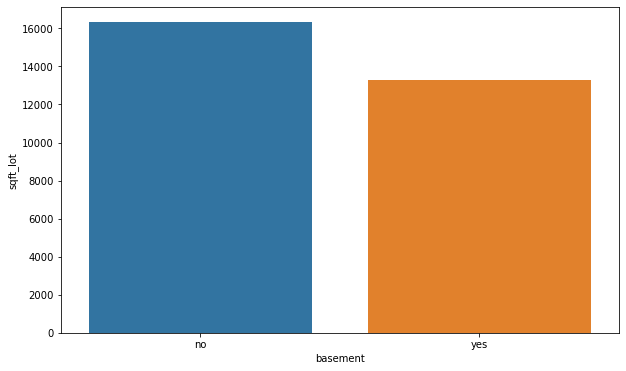

In [49]:
h3 = df[['sqft_lot','basement']].groupby('basement').mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x = h3['basement'],y = h3['sqft_lot'])

In [50]:
h3_percent = (h3.loc[0,'sqft_lot'] - h3.loc[1,'sqft_lot']) / h3.loc[1,'sqft_lot']
print('H3 é verdadeira. Os imóveis sem porão possuem área do lote {0:.0%} maior. Apesar de não ser 40%, iremos considerar como verdadeiro pois a diferença é significativa e dá para usar como métrica na definição de preço para revenda'.format(h3_percent))

H3 é verdadeira. Os imóveis sem porão possuem área do lote 23% maior. Apesar de não ser 40%, iremos considerar como verdadeiro pois a diferença é significativa e dá para usar como métrica na definição de preço para revenda


### H4  O crescimento do preço dos imóveis YoY ( Year over Year) é de 10%.

criei uma coluna filtrando a data de venda apenas com o seu ano. Abaixo irei fazer um groupby e depois uma função com a porcentagem da diferença

<AxesSubplot:xlabel='year', ylabel='price'>

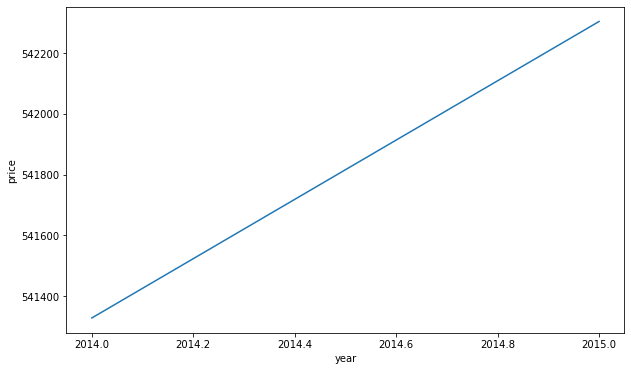

In [51]:
h4 = df[['price','year']].groupby('year').mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x = h4['year'],y = h4['price'])


In [52]:
h4_percent = (h4.loc[1,'price'] - h4.loc[0,'price']) / h4.loc[0,'price']
print('H4 é falsa, pois o crescimento do preço entre os anos foi de {0:.0%}'.format(h4_percent))

H4 é falsa, pois o crescimento do preço entre os anos foi de 0%


# H5: Quanto maior o número de banheiros, maior será o preço

C:\Users\Agilize\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


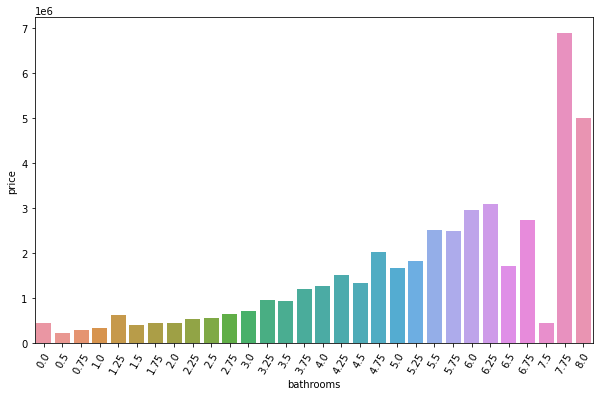

In [53]:
h5 = df[['price', 'bathrooms']].groupby('bathrooms').mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(h5['bathrooms'], y = h5['price'])
plt.xticks( rotation=60 );

In [54]:

print('H5 é verdadeira. Segundo o gráfico, o preço aumenta conforme o número de banheiros aumenta. Podemos ver que certos imóveis com 6 e 7 banheiros estão baratos. Podemos análisar as condições desse imóvel e aumentar o preço de revenda conforme.')

H5 é verdadeira. Segundo o gráfico, o preço aumenta conforme o número de banheiros aumenta. Podemos ver que certos imóveis com 6 e 7 banheiros estão baratos. Podemos análisar as condições desse imóvel e aumentar o preço de revenda conforme.


# 4.0. Questões de negócio

## 4.1. Quais são os imóveis que a House Rocket deveria comprar?

In [55]:
#Agrupar os imóveis por zipcode
df1 = data[['zipcode','price']].groupby('zipcode').median().reset_index()

#renomear a coluna price criada em df1 como price_median
df1 = df1.rename(columns={'price': 'price_median'})

#adicionar essa coluna ao dataset original
df = pd.merge(df1,df,on='zipcode',how='inner')

#criar uma coluna com a orientação se compra ou não compra os imóveis, seguindo as duas condições:

# 1. Se o preço do imóvel estiver com o valor menor que o preço médio daquela região
# 2. Se a condição do imóvel estiver no mínimo médio

for i in range(len(df)):
    
    #1
    if (df.loc[i,'price'] < df.loc[i,'price_median']) & (df.loc[i,'condition'] >= 3):
        df.loc[i,'status'] = 'compra'
    #2
    else:
        df.loc[i,'status'] = 'não compra'


In [63]:
# criar relatório com apenas as colunas de interesse, ordenando do menor preço para o maior, considerando as melhores condições de imóveis 

houses_to_buy = df[df['status'] == 'compra'].sort_values(by=['condition_name','price'])

print(' {} imóveis são sugeridos para compra'.format(len(houses_to_buy)))

 10505 imóveis são sugeridos para compra


## 4.2. Uma vez a casa comprada, qual o melhor momento para vendê-las e por qual preço?

In [68]:
# Para análisar essa questão, iremos levar em consideração a sazonalidade. Criei uma variável que define todas as estações do ano.

# achar o preço médio de cada zipcode em diferentes sazonalidades
df2 = df[['zipcode','season','price']].groupby(['zipcode','season']).median().reset_index()

#renomear coluna para combinar com o dataset original
df2 = df2.rename(columns = {'price': 'price_median_season'})

#juntar ao dataset original e filtrar apenas as casas aptas para compra
df3= pd.merge(houses_to_buy,df2, how='inner', on=['zipcode','season'])

In [70]:
# Se o preço da compra for maior que a mediana da regição + sazonalidade. O preço da venda será igual ao preço da compra +10%

# Se o preço da compra for menor que a mediana da regição + sazonalidade. O preço da venda será igual ao preço da compra +30%

for i in range(len(df3)):
    
            if df3.loc[i, 'price'] <= df3.loc[i, 'price_median_season']:
                 df3.loc[i, 'sale_price'] = df3.loc[i, 'price'] * 1.30
            elif df3.loc[i, 'price'] > df3.loc[i, 'price_median_season']:
                 df3.loc[i, 'sale_price'] = df3.loc[i, 'price'] * 1.10
            else:
                 pass
                
df3['profit'] = df3['sale_price'] - df3['price']


In [79]:
# Os 5 imóveis que dão maior lucro

df3[['id','zipcode','price','price_median','season','price_median_season','condition_name','sale_price','profit']].sort_values(by='profit',ascending = False).head()


,id,zipcode,price,price_median,season,price_median_season,condition_name,sale_price,profit
10504,6447300225,98039,1880000.0,1905000.0,fall,2475000.0,muito bom,2444000.0,564000.0
10488,2470200020,98039,1880000.0,1905000.0,winter,1892500.0,muito bom,2444000.0,564000.0
10485,3262300818,98039,1865000.0,1905000.0,winter,1892500.0,medio,2424500.0,559500.0
10484,5425700205,98039,1800000.0,1905000.0,winter,1892500.0,medio,2340000.0,540000.0
10483,2525049266,98039,1762000.0,1905000.0,winter,1892500.0,medio,2290600.0,528600.0


In [80]:
# Total de lucro que a empresa irá ter, caso siga a sugestão

df3['profit'].sum()

1186638788.2